In [1]:
import maboss
import matplotlib.pyplot as plt
import pandas as pd

### Simulate Ensemble

In [2]:
simulation = maboss.Ensemble(
    path="bundle-exactpkn32-nocyclic-v0",
)
simulation.param.update({'sample_count': 1000000, 'max_time':100, 'time_tick': 1, 'thread_count': 6})

simulation.set_istate("TNF", (1, 0))
simulation.set_istate("FASL", (1, 0))
simulation.set_istate("FADD", (0, 1))
simulation.set_istate("ATP", (0, 1))
simulation.set_istate("cIAP", (0, 1))
simulation.set_outputs(["Survival", "NonACD", "Apoptosis"])
simulation.individual_results = True

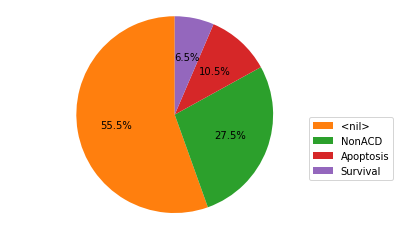

In [3]:
result = simulation.run()
result.plot_piechart()

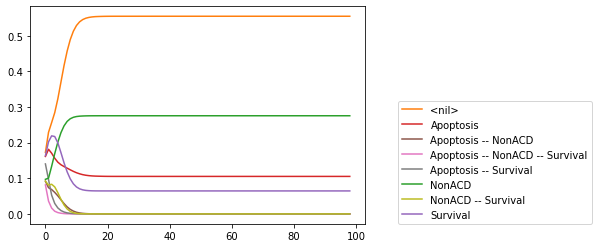

In [4]:
result.plot_trajectory()

In [5]:
table = result.get_individual_states_probtraj()
min_nil = table["<nil>"].idxmin()
min_apoptosis = table["Apoptosis"].idxmin()
min_nonacd = table["NonACD"].idxmin()
min_survival = table["Survival"].idxmin()
max_nil = table["<nil>"].idxmax()
max_apoptosis = table["Apoptosis"].idxmax()
max_nonacd = table["NonACD"].idxmax()
max_survival = table["Survival"].idxmax()
table.iloc[[min_nil, min_apoptosis, min_nonacd, min_survival, max_nil, max_apoptosis, max_nonacd, max_survival], :]

,<nil>,Apoptosis,NonACD,Survival
1045,0.072,0.114,0.180,0.634
2,0.630,0.000,0.370,0.000
16,0.740,0.260,0.000,0.000
0,0.542,0.134,0.324,0.000
139,1.000,0.000,0.000,0.000
1831,0.698,0.302,0.000,0.000
1673,0.436,0.122,0.442,0.000
981,0.080,0.068,0.144,0.708


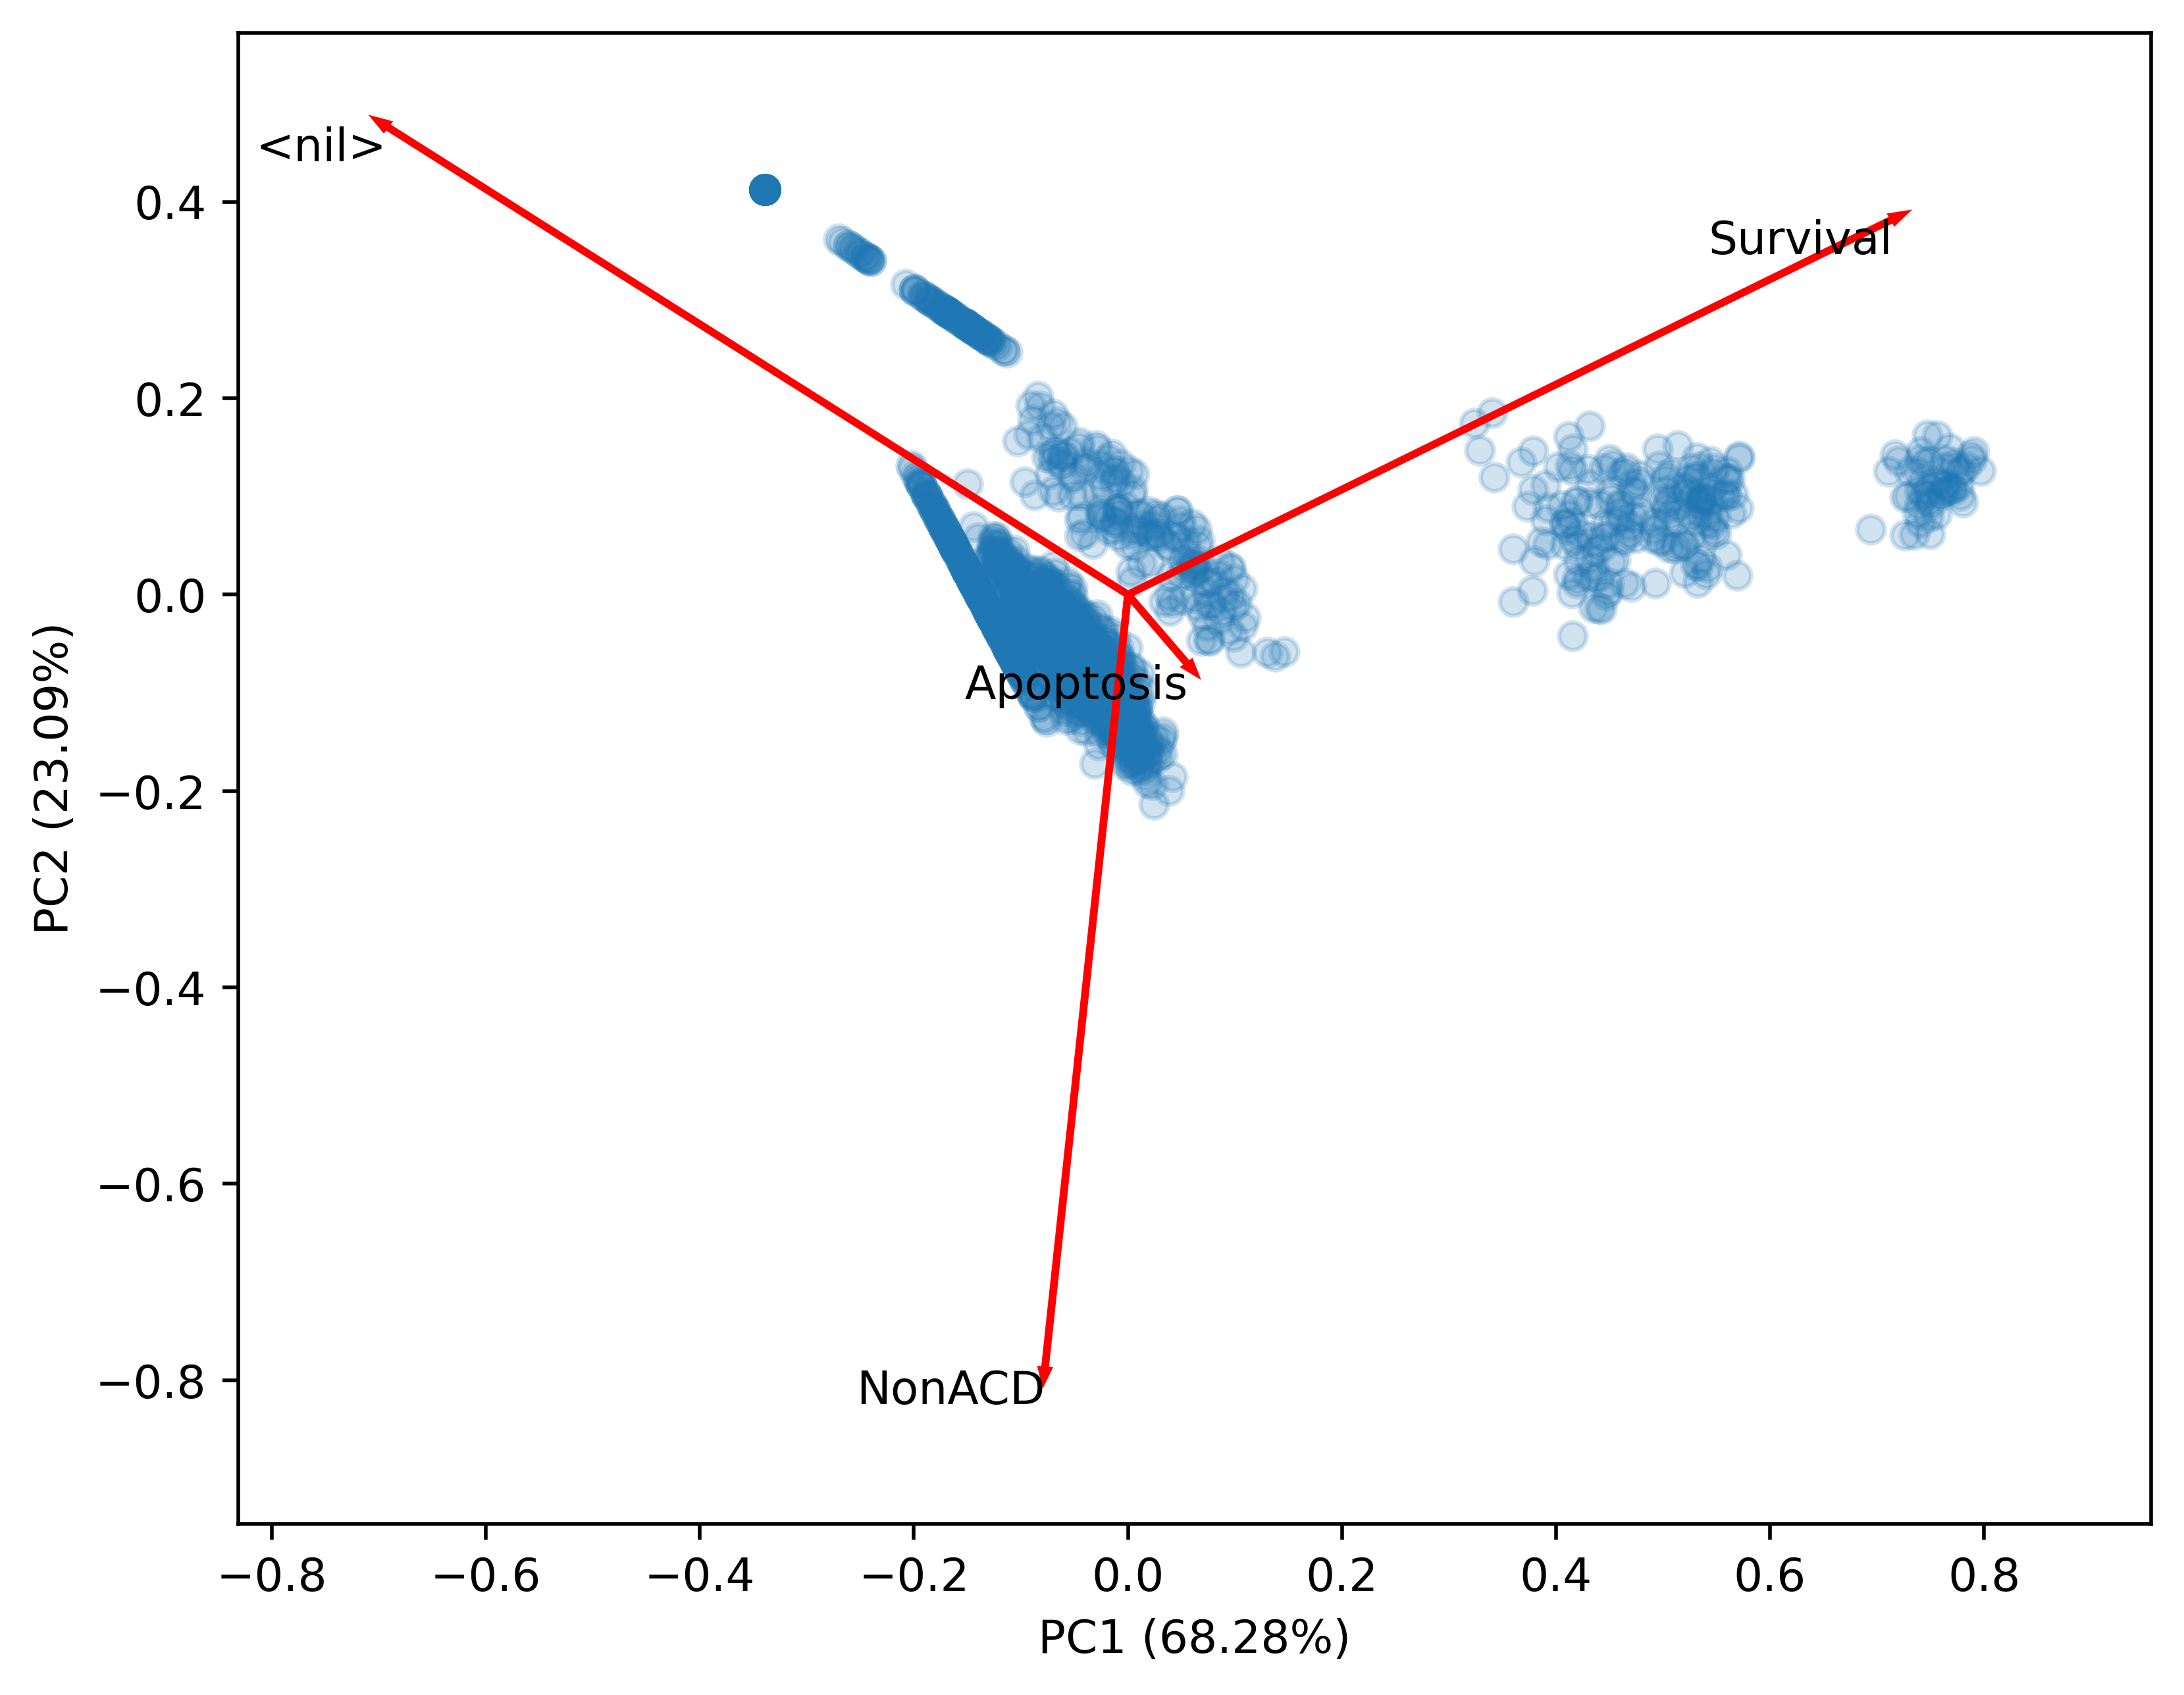

In [6]:
result.plotSteadyStatesDistribution(figsize=(7.5, 6), dpi=500, alpha=0.2)

In [7]:
simulation_tnf = maboss.Ensemble(
    path="bundle-exactpkn32-nocyclic-v0",
)
simulation_tnf.param.update({'sample_count': 1000000, 'max_time':100, 'time_tick': 1, 'thread_count': 6})

simulation_tnf.set_istate("TNF", (0, 1))
simulation_tnf.set_istate("FASL", (1, 0))
simulation_tnf.set_istate("FADD", (0, 1))
simulation_tnf.set_istate("ATP", (0, 1))
simulation_tnf.set_istate("cIAP", (0, 1))
simulation_tnf.set_outputs(["Survival", "NonACD", "Apoptosis"])
simulation_tnf.individual_results = True

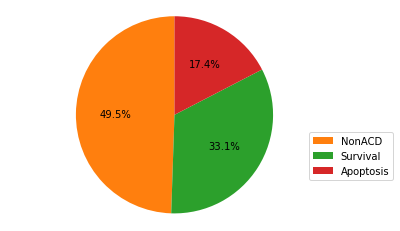

In [8]:
result_tnf = simulation_tnf.run()
result_tnf.plot_piechart()

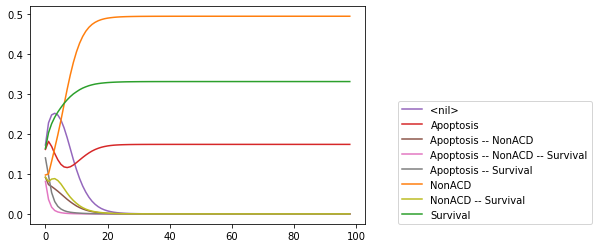

In [9]:
result_tnf.plot_trajectory()

In [10]:
table_tnf = result_tnf.get_individual_states_probtraj()
table_tnf

,Apoptosis,NonACD,Survival
0,0.288,0.412,0.300
1,0.000,0.492,0.508
2,0.086,0.416,0.498
3,0.000,0.948,0.052
4,0.062,0.422,0.516
...,...,...,...
1995,0.088,0.388,0.524
1996,0.282,0.264,0.454
1997,0.000,0.926,0.074
1998,0.064,0.546,0.390


In [11]:
min_apoptosis = table_tnf["Apoptosis"].idxmin()
min_nonacd = table_tnf["NonACD"].idxmin()
min_survival = table_tnf["Survival"].idxmin()
max_apoptosis = table_tnf["Apoptosis"].idxmax()
max_nonacd = table_tnf["NonACD"].idxmax()
max_survival = table_tnf["Survival"].idxmax()
table_tnf.iloc[[min_apoptosis, min_nonacd, min_survival, max_apoptosis, max_nonacd, max_survival], :]

,Apoptosis,NonACD,Survival
1,0.000,0.492,0.508
1644,0.400,0.096,0.504
663,0.360,0.614,0.026
845,0.758,0.152,0.090
925,0.000,0.954,0.046
1420,0.142,0.114,0.744


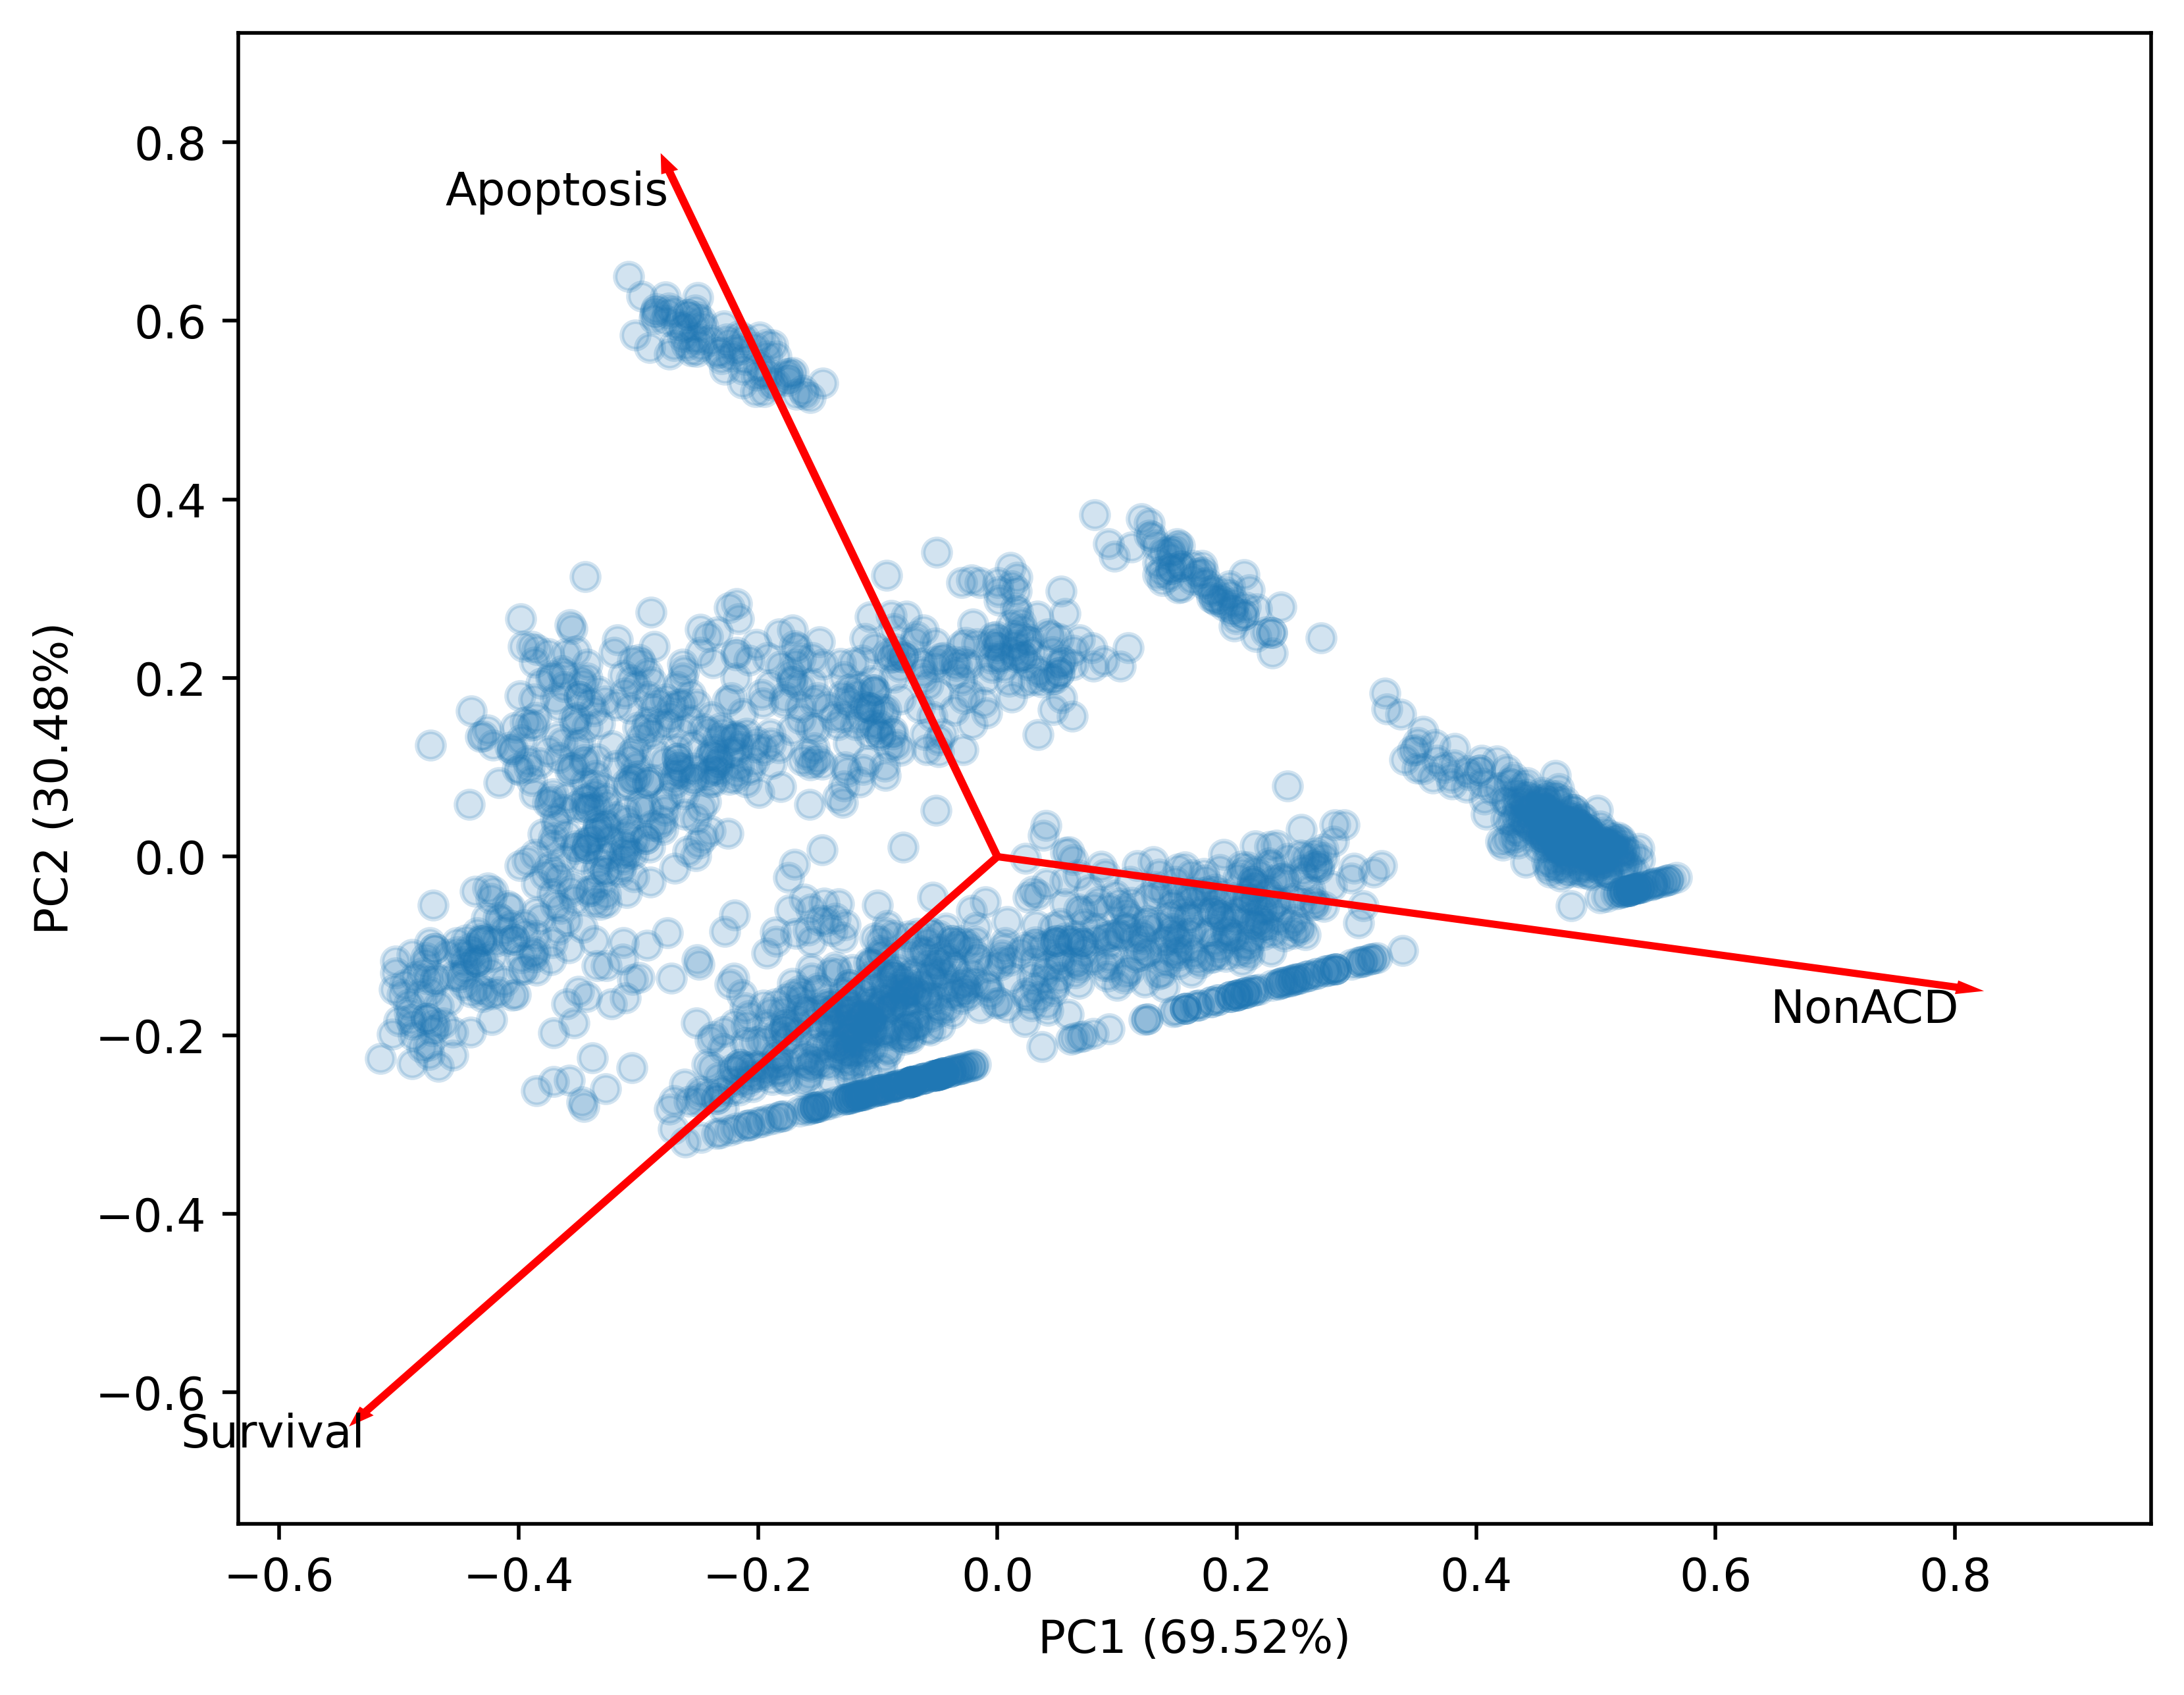

In [12]:
result_tnf.plotSteadyStatesDistribution(figsize=(7.5, 6), dpi=500, alpha=0.2)

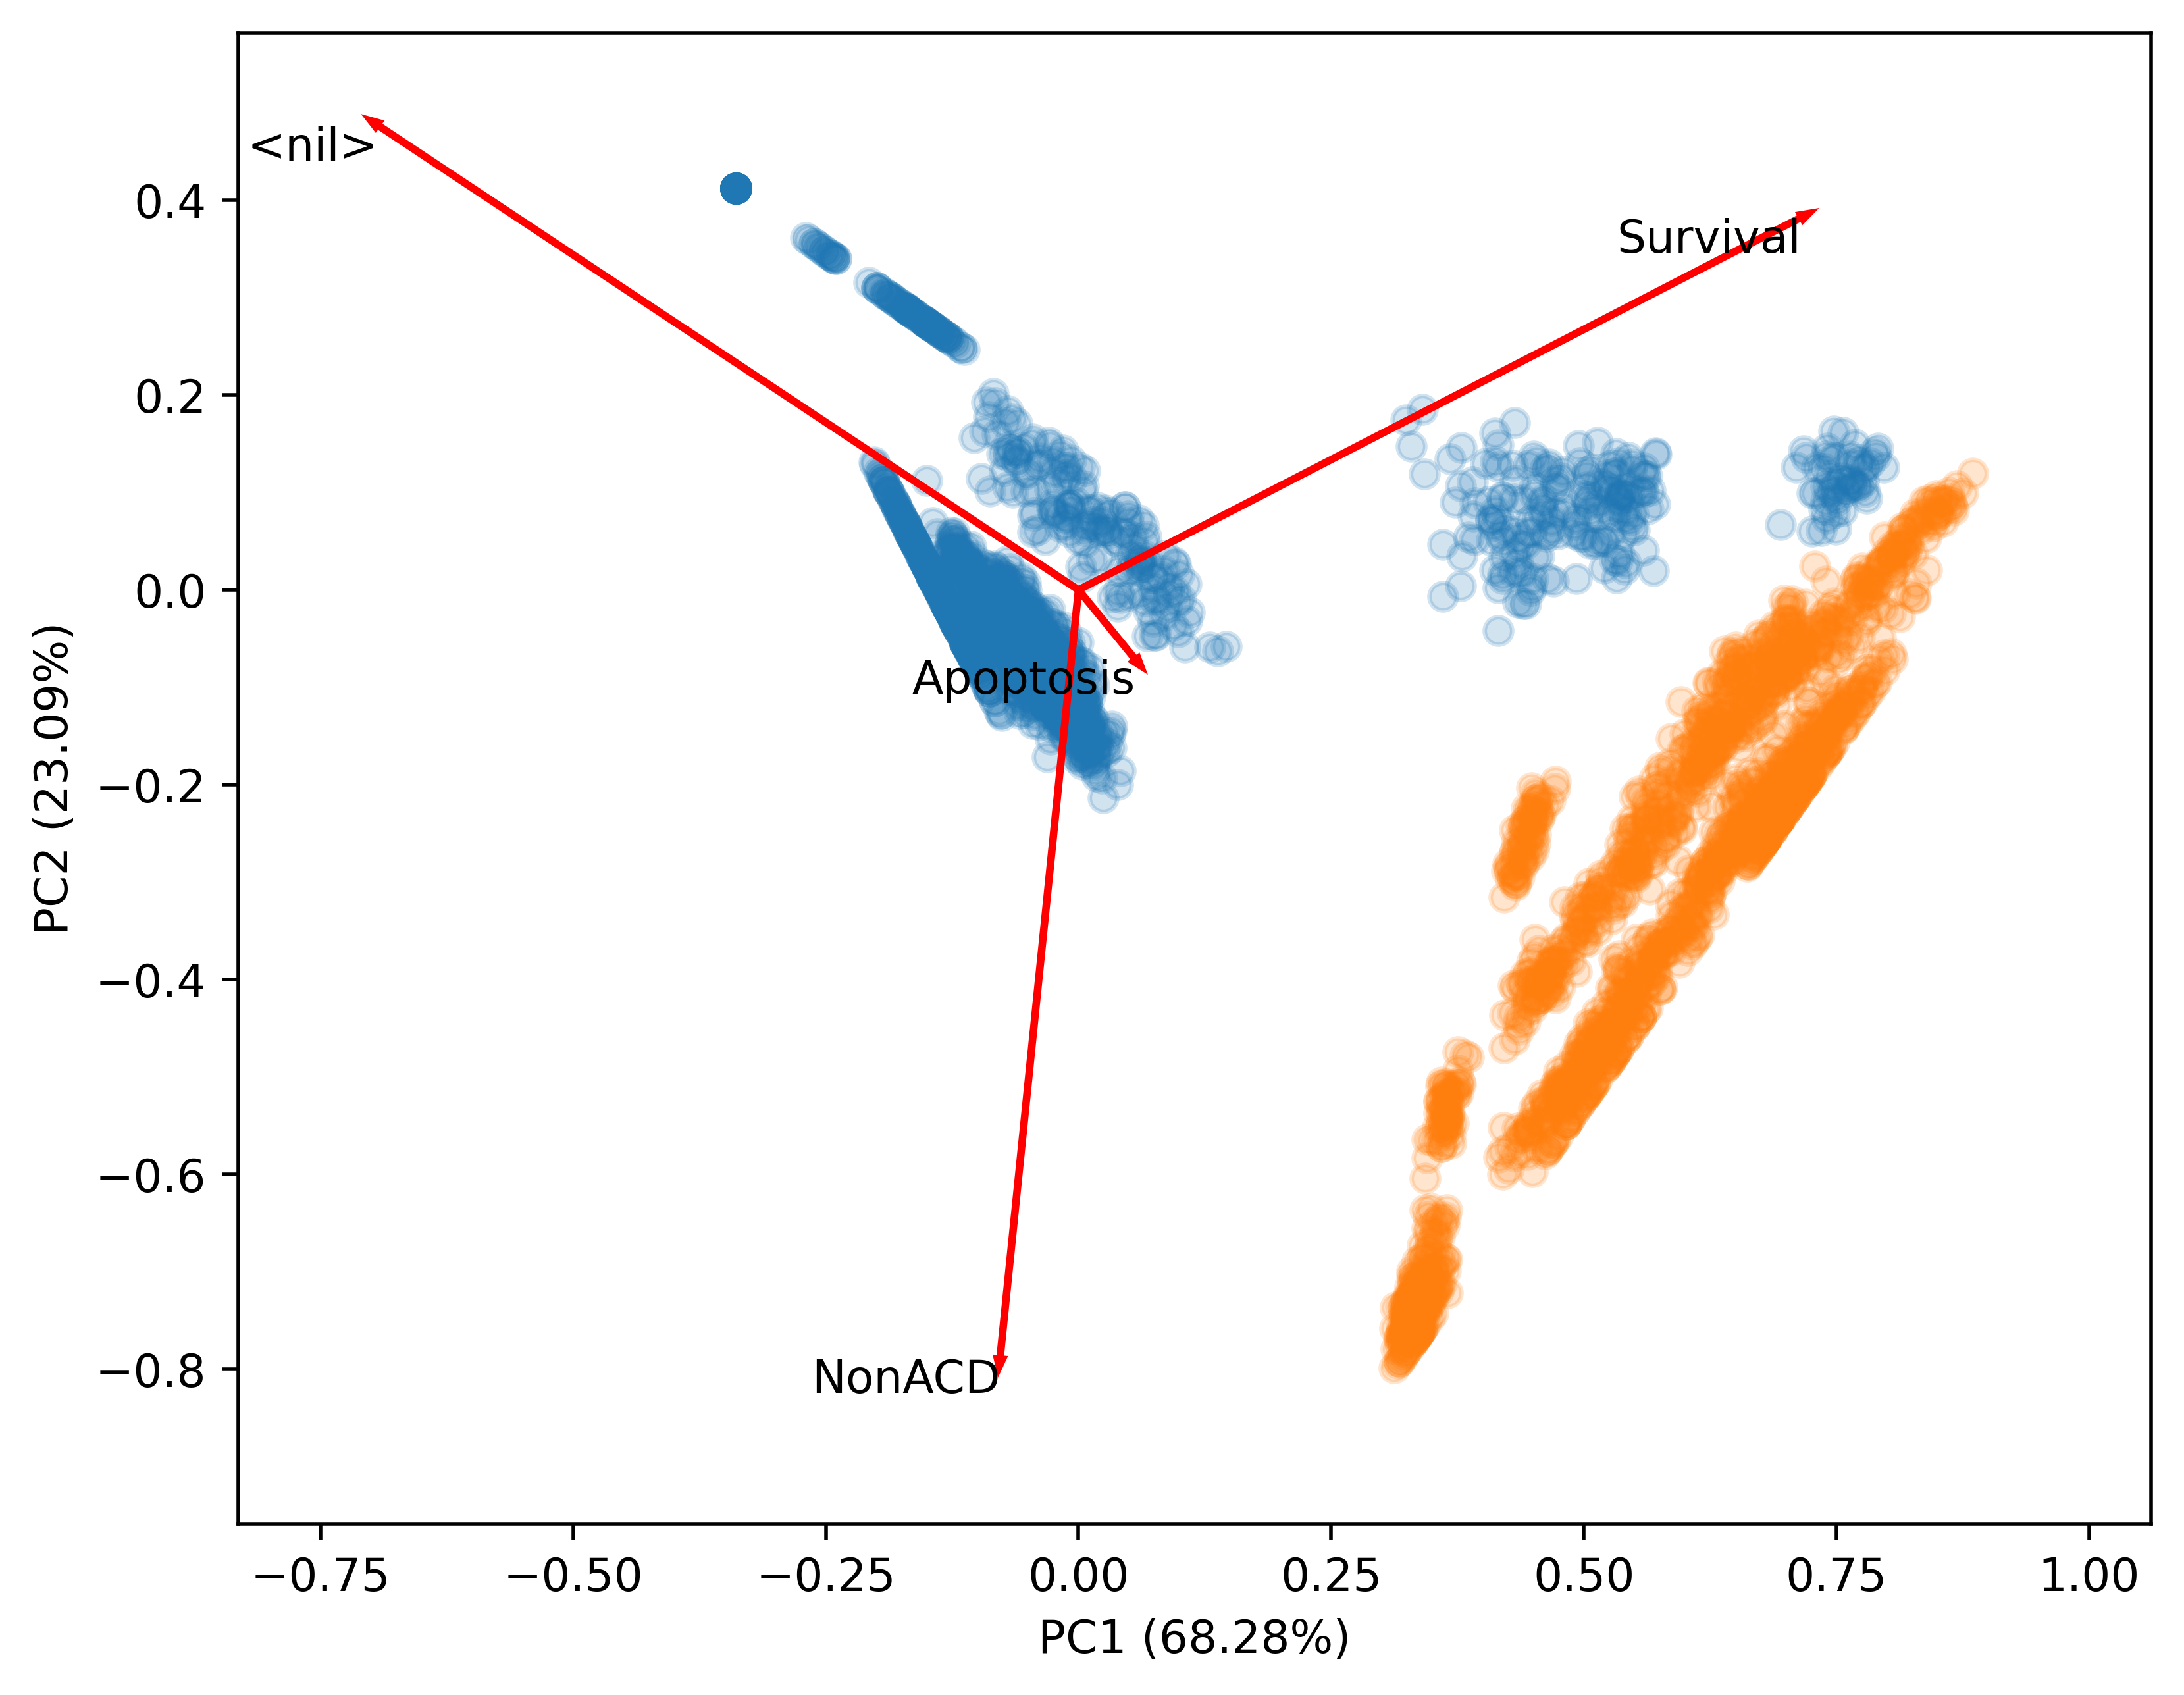

In [13]:
result.plotSteadyStatesDistribution(figsize=(7.5, 6), dpi=500, alpha=0.2, compare=result_tnf)